In [11]:
%matplotlib notebook

import skimage
from skimage import io
import matplotlib.pylab as plt

In [9]:
fp=skimage.io.imread("images/FingerNDG.pgm")

<IPython.core.display.Javascript object>


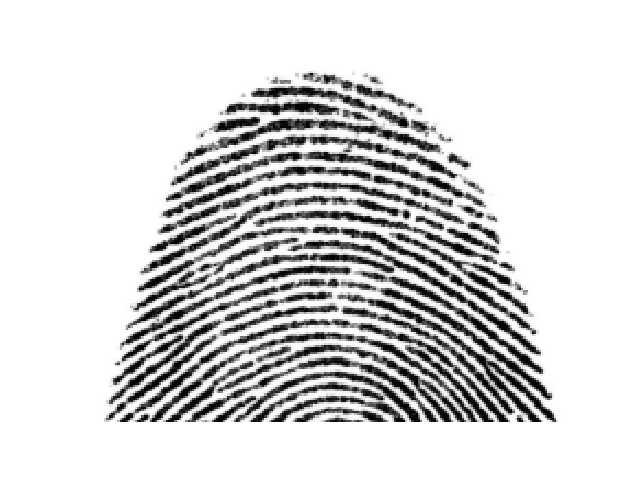

In [26]:
def imview(I,cmap="gray"):
    plt.figure()
    ax=plt.subplot(aspect='equal')
    plt.axis('off')
    plt.imshow(I,cmap="gray")
    plt.show()
    
imview(fp)

<IPython.core.display.Javascript object>


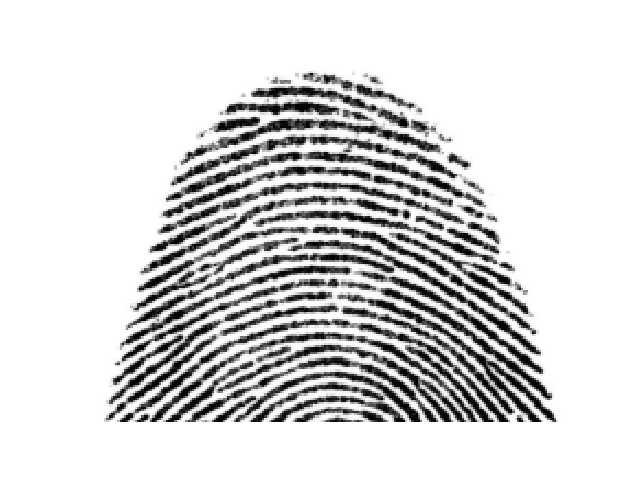

<IPython.core.display.Javascript object>


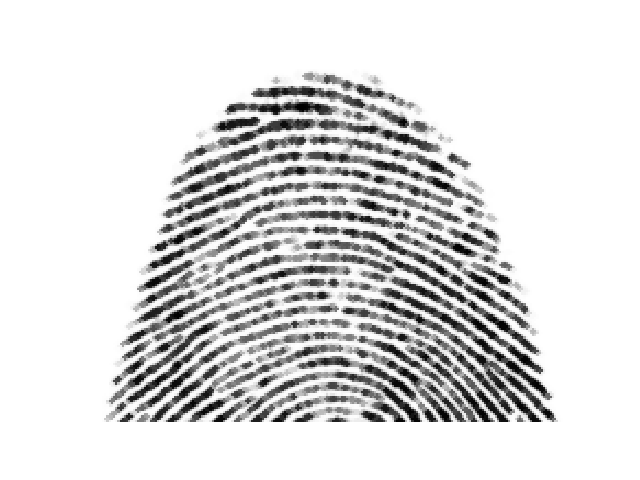

<IPython.core.display.Javascript object>


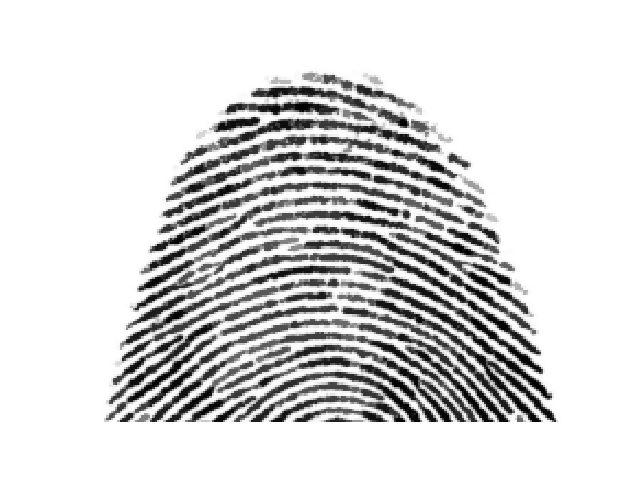

In [33]:
import skimage.morphology

#invfp = 255-fp
#imview(invfp)

imview(fp)

se= skimage.morphology.diamond(1)
fpclo = skimage.morphology.closing(fp,selem=se)
imview(fpclo)

## reconstruction
fprec = skimage.morphology.reconstruction(fpclo,fp,method='erosion')
imview(fprec)

<IPython.core.display.Javascript object>


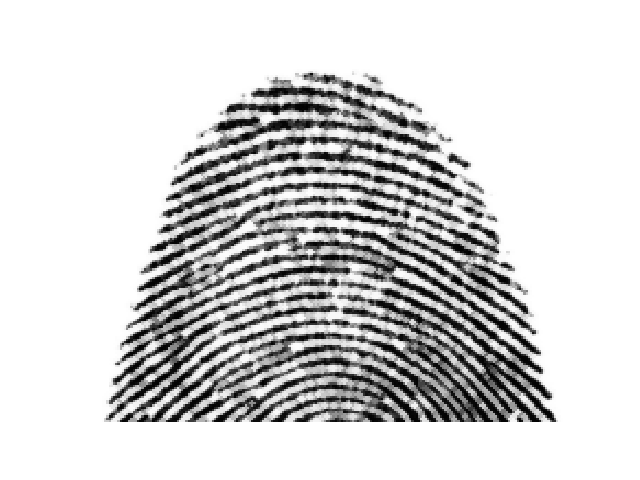

<IPython.core.display.Javascript object>


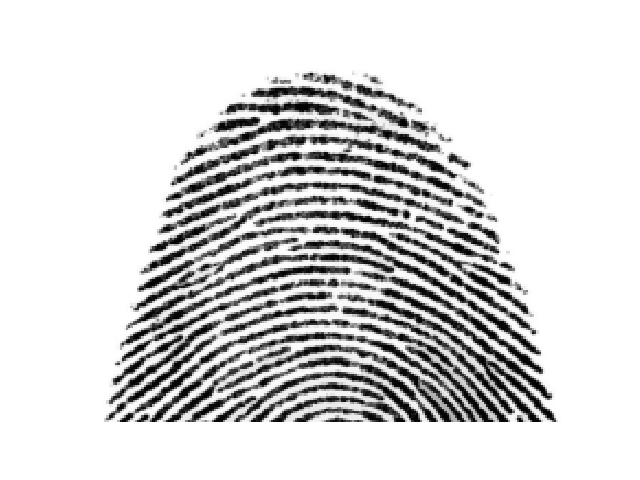

In [35]:
fpope = skimage.morphology.opening(fp,selem=se)
imview(fpope)

## reconstruction
fprec2 = skimage.morphology.reconstruction(fpope,fp, method='dilation')
imview(fprec2)

<IPython.core.display.Javascript object>


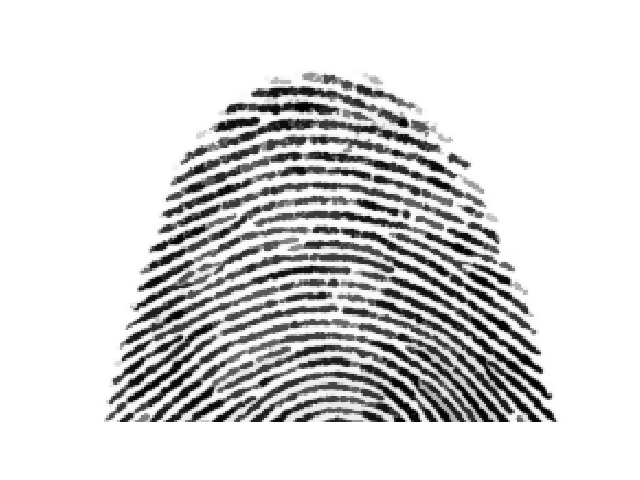

In [38]:
def closeopen(I, se):
    Iclo = skimage.morphology.closing(I,selem=se)
    Irec = skimage.morphology.reconstruction(Iclo,I,method='erosion')
    Iope = skimage.morphology.opening(Irec,selem=se)
    Irec2 = skimage.morphology.reconstruction(Iope,Irec,method='dilation')
    return(Irec2)


fpclean=closeopen(fp,se=skimage.morphology.diamond(1))
imview(fpclean)